In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


# Data pre processing

In [ ]:
#1.Check for missing values:


data.isnull().sum()

#2.Remove duplicates (if any):


data.drop_duplicates(inplace=True)

In [ ]:
# positive -> 1
# negative -> 0
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [ ]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')  # Regex to match HTML tags
    return re.sub(clean, '', text)

def preprocess_text(text):
    text = remove_html_tags(text)  # Remove HTML tags
    text = text.lower()  # Convert to lowercase
    # Other cleaning steps like removing punctuation, etc.
    return text

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
1,24884
0,24698


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train_data.shape

(39665, 2)

In [ ]:
test_data.shape

(9917, 2)

In [ ]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
X_train

array([[   0,    0,    0, ...,  352,  202,  134],
       [   0,    0,    0, ..., 4247,    2, 2721],
       [ 138,   14, 2503, ...,  414,   25,  195],
       ...,
       [2277,   93,   33, ...,    3,  454,  156],
       [   0,    0,    0, ...,  244,  103,  126],
       [   0,    0,    0, ...,    4,    1, 2902]], dtype=int32)

In [ ]:
X_test

array([[   0,    0,    0, ...,    7,  235,  156],
       [1355,    2, 3531, ...,   37,   11,   27],
       [ 366, 1706, 4682, ...,    1, 3979, 2796],
       ...,
       [   7,    1,   19, ...,    7,    7,    7],
       [   0,    0,    0, ...,    1,  308,  316],
       [   0,    0,    0, ...,   81,   14,  666]], dtype=int32)

In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [ ]:
Y_train

,sentiment
7837,0
4814,0
35458,1
3446,0
24478,0
...,...
11304,0
45059,0
38405,0
860,1


# simpleRNN MODEL BUILDING

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SimpleRNN(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5868 - loss: 0.6474 - val_accuracy: 0.7866 - val_loss: 0.4707
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7897 - loss: 0.4708 - val_accuracy: 0.8122 - val_loss: 0.4387
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8200 - loss: 0.4244 - val_accuracy: 0.7930 - val_loss: 0.4583
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8586 - loss: 0.3394 - val_accuracy: 0.8083 - val_loss: 0.4586
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8437 - loss: 0.3732 - val_accuracy: 0.6385 - val_loss: 0.6237
Epoch 6/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7773 - loss: 0.4715 - val_accuracy: 0.8036 - val_loss: 0.4624
Epoch 7/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8559 - loss: 0.3484 - val_accuracy: 0.7169 - val_loss: 0.5811
Epoch 8/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8320 - loss: 0.3918 - 

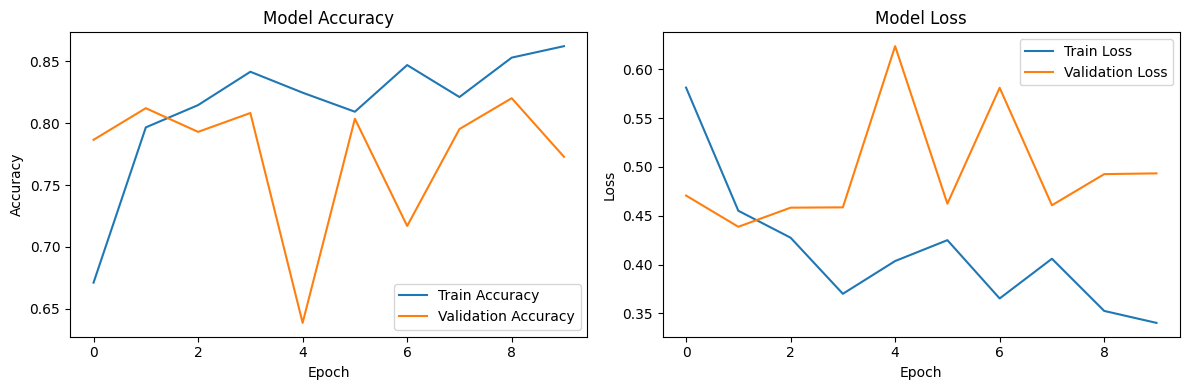

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit(...)
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


model.summary()

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,019,077 (7.70 MB)

 Trainable params: 673,025 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,052 (5.13 MB)

In [ ]:
model.save("model.h5")

In [ ]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7753 - loss: 0.4890


In [ ]:
print(loss)

0.4833114743232727


In [ ]:
print(accuracy)

0.7775536775588989


In [ ]:
# Building Predictive System

In [ ]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


'positive'

In [ ]:
predictive_system("A trilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'positive'

In [ ]:
predictive_system("A visual masterpiece")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'negative'

In [ ]:
predictive_system("Overall long and slow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'negative'

In [ ]:
predictive_system("don't like the plot")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'negative'

In [ ]:
predictive_system("The Journey Within is a beautifully crafted film that touches the soul. With stunning visuals and a heartfelt story, it takes viewers on an emotional journey of self-discovery. The performances are raw and authentic, and the direction is both elegant and powerful. This movie strikes the perfect balance between emotional depth and visual beauty, leaving you inspired and reflective. A must-watch for those who enjoy thought-provoking and uplifting films")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'positive'

In [ ]:
predictive_system("i do not like the story. and directing is also poor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'negative'

In [ ]:
predictive_system("not a good movie at all")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'negative'